# Downloads

In [1]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 7.0 MB/s 


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 8.1 MB/s 
     |████████████████████████████████| 6.6 MB 50.5 MB/s 
     |████████████████████████████████| 596 kB 55.8 MB/s 
     |████████████████████████████████| 101 kB 12.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install einops_exts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! git clone https://github.com/GuiSilvaPA/TextToImage.git

Cloning into 'TextToImage'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 262 (delta 20), reused 27 (delta 11), pack-reused 226
Receiving objects: 100% (262/262), 21.05 MiB | 24.83 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [6]:
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_IMAGES_coco_5_cap_per_img.hdf5
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/VAL_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/VAL_IMAGES_coco_5_cap_per_img.hdf5
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TRAIN_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TRAIN_IMAGES_coco_5_cap_per_img.hdf5

--2022-07-20 21:24:00--  https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_CAPTIONS_coco_5_cap_per_img.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 289777 (283K) [application/json]
Saving to: ‘TEST_CAPTIONS_coco_5_cap_per_img.json’

TEST_CAPTIONS_coco_ 100%[===================>] 282.99K  --.-KB/s    in 0.002s  

2022-07-20 21:24:00 (150 MB/s) - ‘TEST_CAPTIONS_coco_5_cap_per_img.json’ saved [289777/289777]

--2022-07-20 21:24:00--  https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_IMAGES_coco_5_cap_per_img.hdf5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request 

# Imports

In [7]:
import sys
sys.path.insert(0,'/content/TextToImage/Imagen')

In [8]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import json, h5py
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

In [9]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
from ComplexModels import HighResolution
from ImagenTools import HighResolutionCustomDataset, HighResolutionTrainer

Downloading:   0%|          | 0.00/537 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/294M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.2.layer.1.EncDecAttention.k.weight', 'decoder.block.2.layer.1.EncDecAttention.v.weight', 'decoder.block.3.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.7.layer.1.layer_norm.weight', 'decoder.block.1.layer.2.layer_norm.weight', 'decoder.block.6.layer.1.EncDecAttention.v.weight', 'decoder.block.6.layer.0.SelfAttention.q.weight', 'decoder.block.7.layer.2.layer_norm.weight', 'decoder.block.4.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.k.weight', 'decoder.block.4.layer.0.layer_norm.weight', 'decoder.block.6.layer.1.EncDecAttention.k.weight', 'decoder.block.4.layer.1.layer_norm.weight', 'decoder.block.2.layer.0.SelfAttention.v.weight', 'decoder.block.2.layer.0.SelfAttention.k.weight', 'decoder.block.5.layer.1.layer_norm.weight', 'decoder.block.7.layer.1.EncDecAttention.k.weight', 'decoder.block.2.layer.0.SelfAttention.o.weight', 'dec

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.81k [00:00<?, ?B/s]

# Dataset and Model

In [11]:
train_set = HighResolutionCustomDataset("./TRAIN_IMAGES_coco_5_cap_per_img.hdf5", "./TRAIN_CAPTIONS_coco_5_cap_per_img.json", image_size=64)
val_set   = HighResolutionCustomDataset("./VAL_IMAGES_coco_5_cap_per_img.hdf5",   "./VAL_CAPTIONS_coco_5_cap_per_img.json",   image_size=64)
test_set  = HighResolutionCustomDataset("./TEST_IMAGES_coco_5_cap_per_img.hdf5",  "./TEST_CAPTIONS_coco_5_cap_per_img.json",  image_size=64)

## Teste

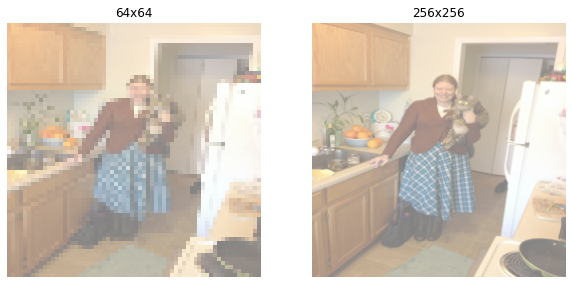

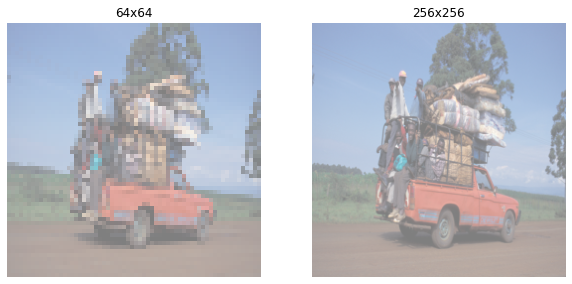

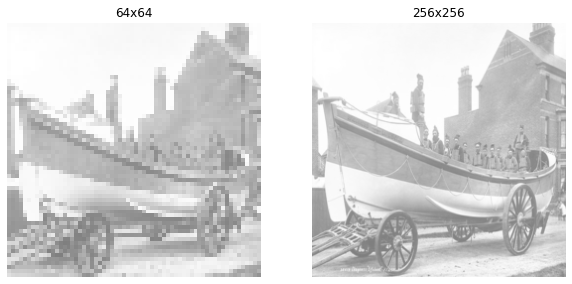

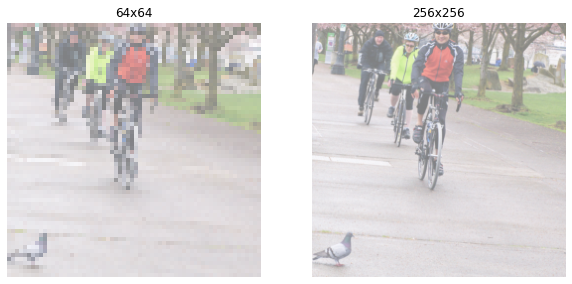

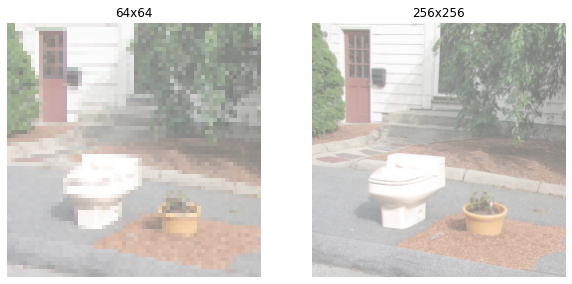

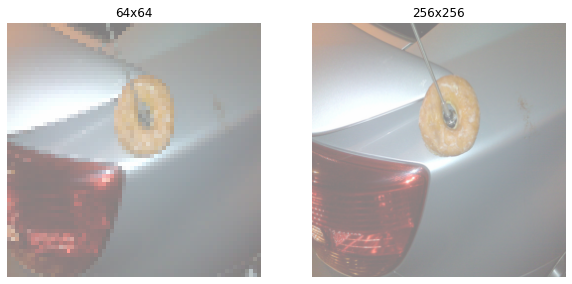

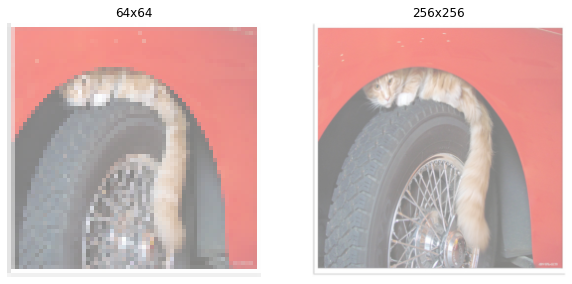

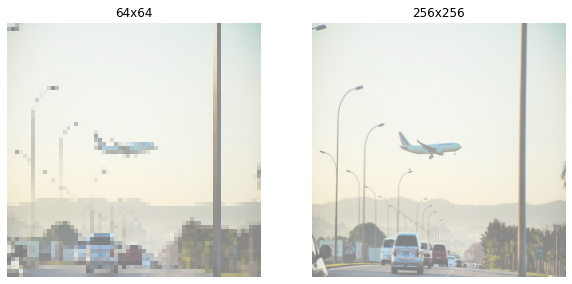

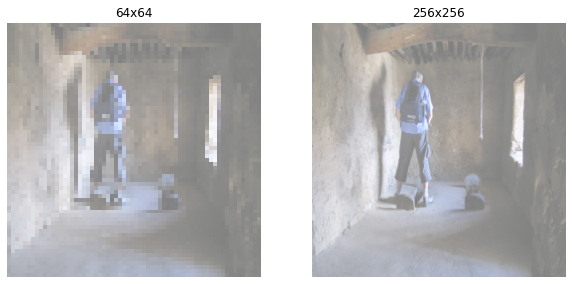

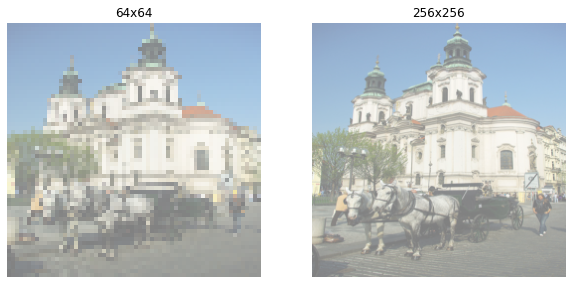

In [12]:
train_loader = DataLoader(train_set, batch_size=10)
imgs, high_imgs = next(iter(train_loader))

for img, im in zip(imgs, high_imgs):

    img = img.cpu()
    fig = plt.figure(figsize=(10, 5))

    fig.add_subplot(1, 2, 1)
    plt.imshow((img.numpy().transpose(1, 2, 0)+1)/2)
    plt.title('64x64')
    plt.axis('off')

    fig.add_subplot(1, 2, 2)
    plt.imshow((im.numpy().transpose(1, 2, 0)+1)/2)
    plt.title('256x256')
    plt.axis('off')

    plt.show()

    print('\n=========================================================================== \n')

## Model

In [13]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [14]:
batch_size  = 20
num_workers = 2

train_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size, num_workers=num_workers)
val_loader   = DataLoader(val_set, batch_size=1, num_workers=num_workers)
test_loader  = DataLoader(test_set, batch_size=30, num_workers=num_workers)

In [23]:
high_model = HighResolution([3, 16, 64]).to(device)

# Training

In [34]:
from pathlib import Path
path = Path('/content/drive/MyDrive/Guilherme/HIGH_Resolution/high_model.pth.tar')

high_model = HighResolution([3, 16, 64]).to(device)
high_model.load_state_dict(torch.load(str(path)))

<All keys matched successfully>

In [35]:
HRT = HighResolutionTrainer(high_model, epochs = 20, lr = 1e-4, device=device)

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 1 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 1 | Train Loss: 1.2835079877554965 | Valid Loss: 0.109740476697655

================================ EPOCH 2 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 2 | Train Loss: 1.2740286949667192 | Valid Loss: 0.10930972488618282

================================ EPOCH 3 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 3 | Train Loss: 1.2606395622018447 | Valid Loss: 0.10854523170902305

================================ EPOCH 4 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 4 | Train Loss: 1.2496119093301954 | Valid Loss: 0.10841163811928986

================================ EPOCH 5 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 5 | Train Loss: 1.2374509559931601 | Valid Loss: 0.10796524265235707

================================ EPOCH 6 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 6 | Train Loss: 1.2291884812570752 | Valid Loss: 0.10754053917192914

================================ EPOCH 7 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 7 | Train Loss: 1.218259546677677 | Valid Loss: 0.10737816305802746

================================ EPOCH 8 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 8 | Train Loss: 1.2099075610084193 | Valid Loss: 0.10702338733997181

================================ EPOCH 9 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 9 | Train Loss: 1.2010400144218587 | Valid Loss: 0.10665407302318416

================================ EPOCH 10 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 10 | Train Loss: 1.19654935113072 | Valid Loss: 0.10664758677399601

================================ EPOCH 11 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 11 | Train Loss: 1.185563217316355 | Valid Loss: 0.10609220021613254

================================ EPOCH 12 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 12 | Train Loss: 1.1820163531545675 | Valid Loss: 0.1059389385561186

================================ EPOCH 13 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 13 | Train Loss: 1.1715785574269335 | Valid Loss: 0.1056545785178533

================================ EPOCH 14 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 14 | Train Loss: 1.1628728565208766 | Valid Loss: 0.10559203914462273

================================ EPOCH 15 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 15 | Train Loss: 1.159173186843087 | Valid Loss: 0.10502184548206316

================================ EPOCH 16 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 16 | Train Loss: 1.1588751373901254 | Valid Loss: 0.10512459689588374

================================ EPOCH 17 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 17 | Train Loss: 1.145055711548142 | Valid Loss: 0.10485766691902915

================================ EPOCH 18 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 18 | Train Loss: 1.1404423581651684 | Valid Loss: 0.1045404111314919

================================ EPOCH 19 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 19 | Train Loss: 1.1323956149269123 | Valid Loss: 0.10447019117994114

================================ EPOCH 20 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 20 | Train Loss: 1.133132976524177 | Valid Loss: 0.10430728434673564


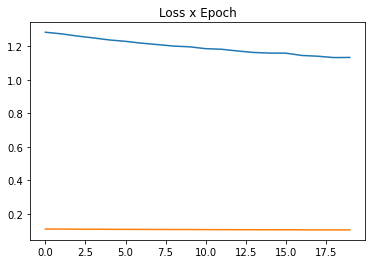

In [36]:
HRT(train_loader, val_loader, path='/content/drive/MyDrive/Guilherme/HIGH_Resolution/high_modelv2.pth.tar')

In [38]:
from pathlib import Path
path = Path('/content/drive/MyDrive/Guilherme/HIGH_Resolution/high_modelv2.pth.tar')

high_model = HighResolution([3, 16, 64]).to(device)
high_model.load_state_dict(torch.load(str(path)))

<All keys matched successfully>

In [39]:
imgs, high_imgs = next(iter(test_loader))

In [40]:
pred = high_model(imgs.float().to(device))

In [41]:
for img, im in zip(pred, high_imgs):

    img = img.cpu()
    fig = plt.figure(figsize=(10, 5))

    fig.add_subplot(1, 2, 1)
    plt.imshow((img.detach().numpy().transpose(1, 2, 0)+1)/2)
    plt.title('64x64')
    plt.axis('off')

    fig.add_subplot(1, 2, 2)
    plt.imshow((im.numpy().transpose(1, 2, 0)+1)/2)
    plt.title('256x256')
    plt.axis('off')

    plt.show()

    print('\n=========================================================================== \n')

Output hidden; open in https://colab.research.google.com to view.

In [42]:
for img, im in zip(imgs, pred):

    img = img.cpu()
    fig = plt.figure(figsize=(10, 5))

    fig.add_subplot(1, 2, 1)
    plt.imshow((img.detach().numpy().transpose(1, 2, 0)+1)/2)
    plt.title('64x64')
    plt.axis('off')

    fig.add_subplot(1, 2, 2)
    plt.imshow((im.cpu().detach().numpy().transpose(1, 2, 0)+1)/2)
    plt.title('256x256')
    plt.axis('off')

    plt.show()

    print('\n=========================================================================== \n')

Output hidden; open in https://colab.research.google.com to view.